<a href="https://colab.research.google.com/github/xychong/miniproject/blob/main/Data_Augmentation_10_Frozen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = "/content/drive/MyDrive/Data/train"
train_path_cat = "/content/drive/MyDrive/Data/train/cat"
train_path_dog = "/content/drive/MyDrive/Data/train/dog"

val_path = "/content/drive/MyDrive/Data/val"
val_path_cat = "/content/drive/MyDrive/Data/val/cat"
val_path_dog = "/content/drive/MyDrive/Data/val/dog"

test_path = "/content/drive/MyDrive/Data/test/"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')
#train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(150,150),
                                                  batch_size = 32,
                                                  class_mode = 'binary')

val_dataset = val_datagen.flow_from_directory(val_path,
                                              target_size=(150,150),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(150, 150, 3))
print(vgg_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
model = keras.Sequential([
        # our vgg16_base model added as a layer
        vgg_base,
        # here is our custom prediction layer 
        keras.layers.Flatten(),
        #keras.layers.Dropout(0.50),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.20),        
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.10),         
        keras.layers.Dense(1, activation='sigmoid')    
    ])

# Freeze the base model
vgg_base.trainable = False

for layer in vgg_base.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fda9b325190> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf434b290> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf434c050> False
<keras.layers.pooling.MaxPooling2D object at 0x7fdaf434c110> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf426e7d0> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf426e4d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fdaf41f4fd0> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf41fc510> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf41fcfd0> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf4341690> False
<keras.layers.pooling.MaxPooling2D object at 0x7fdaf420b710> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf420ded0> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf420b2d0> False
<keras.layers.convolutional.Conv2D object at 0x7fdaf421a6d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fdaf4223790>

In [8]:
# Adjust the learning rate of Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt ,loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
train_steps = train_dataset.n // 32
val_steps = val_dataset.n // 32

print(train_steps)
print(val_steps)

100
25


In [10]:
training = model.fit(train_dataset, steps_per_epoch=train_steps, epochs=10, validation_data=val_dataset, validation_steps=val_steps)

Epoch 1/10
100/100 [==============================] - 893s 9s/step - loss: 0.4608 - accuracy: 0.7728 - val_loss: 0.3468 - val_accuracy: 0.8512
Epoch 2/10
100/100 [==============================] - 885s 9s/step - loss: 0.3838 - accuracy: 0.8178 - val_loss: 0.2898 - val_accuracy: 0.8900
Epoch 3/10
100/100 [==============================] - 892s 9s/step - loss: 0.3557 - accuracy: 0.8359 - val_loss: 0.2679 - val_accuracy: 0.8925
Epoch 4/10
100/100 [==============================] - 888s 9s/step - loss: 0.3511 - accuracy: 0.8425 - val_loss: 0.2694 - val_accuracy: 0.8963
Epoch 5/10
100/100 [==============================] - 916s 9s/step - loss: 0.3373 - accuracy: 0.8472 - val_loss: 0.2883 - val_accuracy: 0.8925
Epoch 6/10
100/100 [==============================] - 915s 9s/step - loss: 0.3090 - accuracy: 0.8669 - val_loss: 0.3354 - val_accuracy: 0.8575
Epoch 7/10
100/100 [==============================] - 925s 9s/step - loss: 0.3096 - accuracy: 0.8616 - val_loss: 0.2545 - val_accuracy: 0.8975

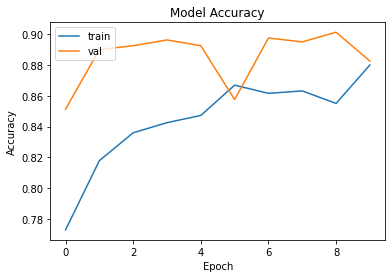

In [11]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

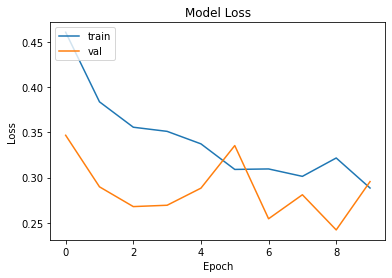

In [12]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
submission = pd.DataFrame(columns=['id','label'])
submission

,id,label


In [14]:
test_label = []
count = 0
for filename in os.listdir(test_path):
  first_word = filename.split('.')[0]
  img = image.load_img(test_path + filename, target_size = (150,150)) # load and resize image as 150x150
  Y = image.img_to_array(img) # convert image into a numpy array 
  X = np.expand_dims(Y,axis=0) # expand the dimension of that array
  val = model.predict(X)
  test_label.append(int(val))
  submission = submission.append({'id': int(first_word),'label': int(val)}, ignore_index=True)
  count += 1

print(test_label)

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 

In [15]:
submission
submission.to_csv('/content/drive/MyDrive/Data/submission10_aug_frozen.csv')  

In [16]:
sorted_submission = submission.sort_values('id')
sorted_submission
sorted_submission.to_csv('/content/drive/MyDrive/Data/sorted_submission10_aug_frozen.csv')  

In [17]:
sorted_submission

,id,label
466,1,1
431,2,1
459,3,1
345,4,1
376,5,1
...,...,...
315,496,1
337,497,1
164,498,0
151,499,1
